<a href="https://colab.research.google.com/github/RoiCgovz/AI/blob/main/Student_AI_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Predict Score based on Study Time assisted by AI

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).



# Dataset Source: https://www.kaggle.com/datasets/llovek/survey-on-ai-usage-among-university-students

TLDR: Dataset is Chinese, but we translated it to English to be readable for non-chinese speakers/reader

In [ ]:
import os

os.chdir("/content/drive/MyDrive/Datasets")
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in%r: %s" % (cwd,files))

Files in'/content/drive/MyDrive/Datasets': ['banana_quality.csv', 'studentAIUsage.csv', 'studentAIUsage.gsheet']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


# Load the Dataset inside the Drive

In [ ]:
#load the data set to be analyze; the data set is loaded to the object dataframe named 'df' (this is user-defined)
dataSet = pd.read_csv('studentAIUsage.csv')
df = pd.DataFrame(dataSet)

In [ ]:
df

grade  Whether AI is used in the learning process  \
0        Freshman                                           1   
1        Freshman                                           1   
2        Freshman                                           1   
3        Freshman                                           1   
4     Senior year                                           1   
...           ...                                         ...   
4417          NaN                                           0   
4418     Freshman                                           1   
4419  Junior year                                           1   
4420     Freshman                                           1   
4421     Freshman                                           1   

      Is the first test score     Institutional Level  \
0                         1.0      Double First-Class   
1                         1.0      Double First-Class   
2                         1.0      Double First-Class   
3                         1.0  Ordinary undergraduate   
4                         1.0              Specialist   
...                       ...                     ...   
4417                      NaN                     NaN   
4418                      0.0      Double First-Class   
4419                      1.0  Ordinary undergraduate   
4420                      1.0  Ordinary undergraduate   
4421                      1.0  Ordinary undergraduate   

     College Entrance Examination Provinces  gender   age  \
0                                   Beijing  female  19.0   
1                                  Zhejiang  female  19.0   
2                                   Beijing  female  18.0   
3                                  Zhejiang    male  18.0   
4                                  Zhejiang  female  19.0   
...                                     ...     ...   ...   
4417                                    NaN     NaN   NaN   
4418                           Heilongjiang  female  18.0   
4419                                Sichuan    male  20.0   
4420                                Qinghai  female  17.0   
4421                              Chongqing  female  19.0   

                           Major categories  Father's years of education  \
0        Civil Engineering and Architecture                         14.0   
1     Agriculture, Forestry and Environment                         10.0   
2        Civil Engineering and Architecture                         15.0   
3                                 Economics                         12.0   
4                                Mechanical                         14.0   
...                                     ...                          ...   
4417                                    NaN                          NaN   
4418                              Economics                         14.0   
4419                 Electronic Information                         11.0   
4420                Mathematics and Physics                         13.0   
4421                               Computer                         11.0   

      Mother's years of education  ...  AI Literacy Objective Test III  \
0                            11.0  ...                             1.0   
1                            11.0  ...                             1.0   
2                            16.0  ...                             1.0   
3                            12.0  ...                             1.0   
4                            13.0  ...                             NaN   
...                           ...  ...                             ...   
4417                          NaN  ...                             NaN   
4418                         11.0  ...                             1.0   
4419                         14.0  ...                             0.0   
4420                         13.0  ...                             1.0   
4421                         13.0  ...                             1.0   

      Weekl

# Display the Top 5 rows and the shape, info and description of the data

In [ ]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4422 entries, 0 to 4421
Data columns (total 36 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   grade                                                              4130 non-null   object 
 1   Whether AI is used in the learning process                         4422 non-null   int64  
 2   Is the first test score                                            4130 non-null   float64
 3   Institutional Level                                                4130 non-null   object 
 4   College Entrance Examination Provinces                             4130 non-null   object 
 5   gender                                                             4130 non-null   object 
 6   age                                                                4130 non-null   float64
 7   Major categories        

Whether AI is used in the learning process  Is the first test score  \
count                                 4422.000000              4130.000000   
mean                                     0.933967                 0.934867   
std                                      0.248369                 0.246791   
min                                      0.000000                 0.000000   
25%                                      1.000000                 1.000000   
50%                                      1.000000                 1.000000   
75%                                      1.000000                 1.000000   
max                                      1.000000                 1.000000   

               age  Father's years of education  Mother's years of education  \
count  4130.000000                  4085.000000                  4100.000000   
mean     18.543826                    12.024725                    12.031463   
std       0.728044                     2.335714                     2.291671   
min      17.000000                     4.000000                     3.000000   
25%      18.000000                    10.000000                    11.000000   
50%      19.000000                    12.000000                    12.000000   
75%      19.000000                    14.000000                    14.000000   
max      21.000000                    20.000000                    19.000000   

       Household income quintile - self-assessment  \
count                                  4095.000000   
mean                                      3.099634   
std                                       1.226175   
min                                       1.000000   
25%                                       2.000000   
50%                                       3.000000   
75%                                       4.000000   
max                                       5.000000   

       Parents' occupational status ISEI  Total family assets_10,000 yuan  \
count                        4098.000000                      4104.000000   
mean                           49.578575                      1070.221979   
std                            13.083277                      1853.547104   
min                            10.000000                        20.000000   
25%                            40.600000                        93.000000   
50%                            49.500000                       343.000000   
75%                            58.400000                      1174.000000   
max                            90.000000                     13900.000000   

       Family Book Collection_Level 10  \
count                      4102.000000   
mean                          5.452706   
std                           2.228384   
min                           1.000000   
25%                           4.000000   
50%                           6.000000   
75%                           7.000000   
max                          10.000000   

       Number of museum visits during high school  ...  \
count                                 4110.000000  ...   
mean                                     5.024331  ...   
std                                      2.686670  ...   
min                                      0.000000  ...   
25%                                      3.000000  ...   
50%                                      5.000000  ...   
75%                                      7.000000  ...   
max                                     17.000000  ...   

       AI Literacy Objective Test III  Weekly study time/h  \
count                     4100.000000          4099.000000   
mean                         0.687561            20.150500   
std                          0.463544             6.466985   
min                          0.000000             2.000000   
25%                          0.000000            15.700000   
50%                          1.000000            20.200000   
75%                          1.000000            24.350000   
max 

In [ ]:
df.columns

Index(['grade', 'Whether AI is used in the learning process',
       'Is the first test score', 'Institutional Level',
       'College Entrance Examination Provinces', 'gender', 'age',
       'Major categories', 'Father's years of education',
       'Mother's years of education',
       'Household income quintile - self-assessment',
       'Parents' occupational status ISEI', 'Total family assets_10,000 yuan',
       'Family Book Collection_Level 10',
       'Number of museum visits during high school',
       'Number of art activities in high school',
       'Extracurricular reading time h/week', 'AI perceived usefulness',
       'AI-aware usability', 'Attitude towards using AI', 'AI usage intention',
       'AI Knowledge Dimension', 'AI Skills Dimension',
       'The ethical dimension of AI', 'AI Literacy Objective Test 1',
       'AI Literacy Objective Test II', 'AI Literacy Objective Test III',
       'Weekly study time/h', 'Study time one week before the exam/h',
       'AI weekly

# Drop the non-numerical value and the columns that are not related

In [ ]:
cols_to_drop = [
    # First batch
    "Whether AI is used in the learning process",
    "Is the first test score",
    "Father's years of education",
    "Mother's years of education",
    "Household income quintile - self-assessment",
    "Parents' occupational status ISEI",
    "Total family assets_10,000 yuan",
    "Family Book Collection_Level 10",
    "Number of museum visits during high school",
    "Number of art activities in high school",
    "Self-evaluation of AI learning benefits",
    "AI perceived usefulness",
    "AI-aware usability",
    "Attitude towards using AI",
    "AI usage intention",
    "AI Knowledge Dimension",
    "AI Skills Dimension",
    "The ethical dimension of AI",
    "AI Literacy Objective Test 1",
    "AI Literacy Objective Test II",
    "AI Literacy Objective Test III"
]

df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

df = df.select_dtypes(include=["number"])

<Axes: >

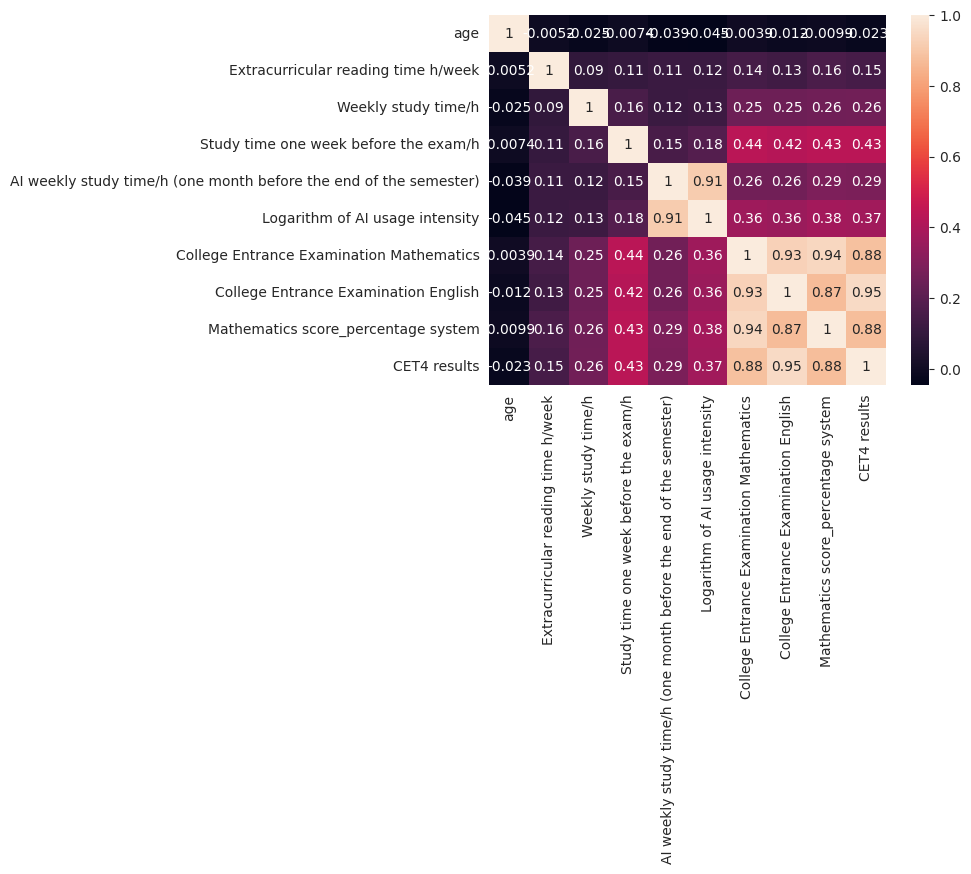

In [ ]:
sns.heatmap(df.corr(),annot=True)


# Print the Pairplot

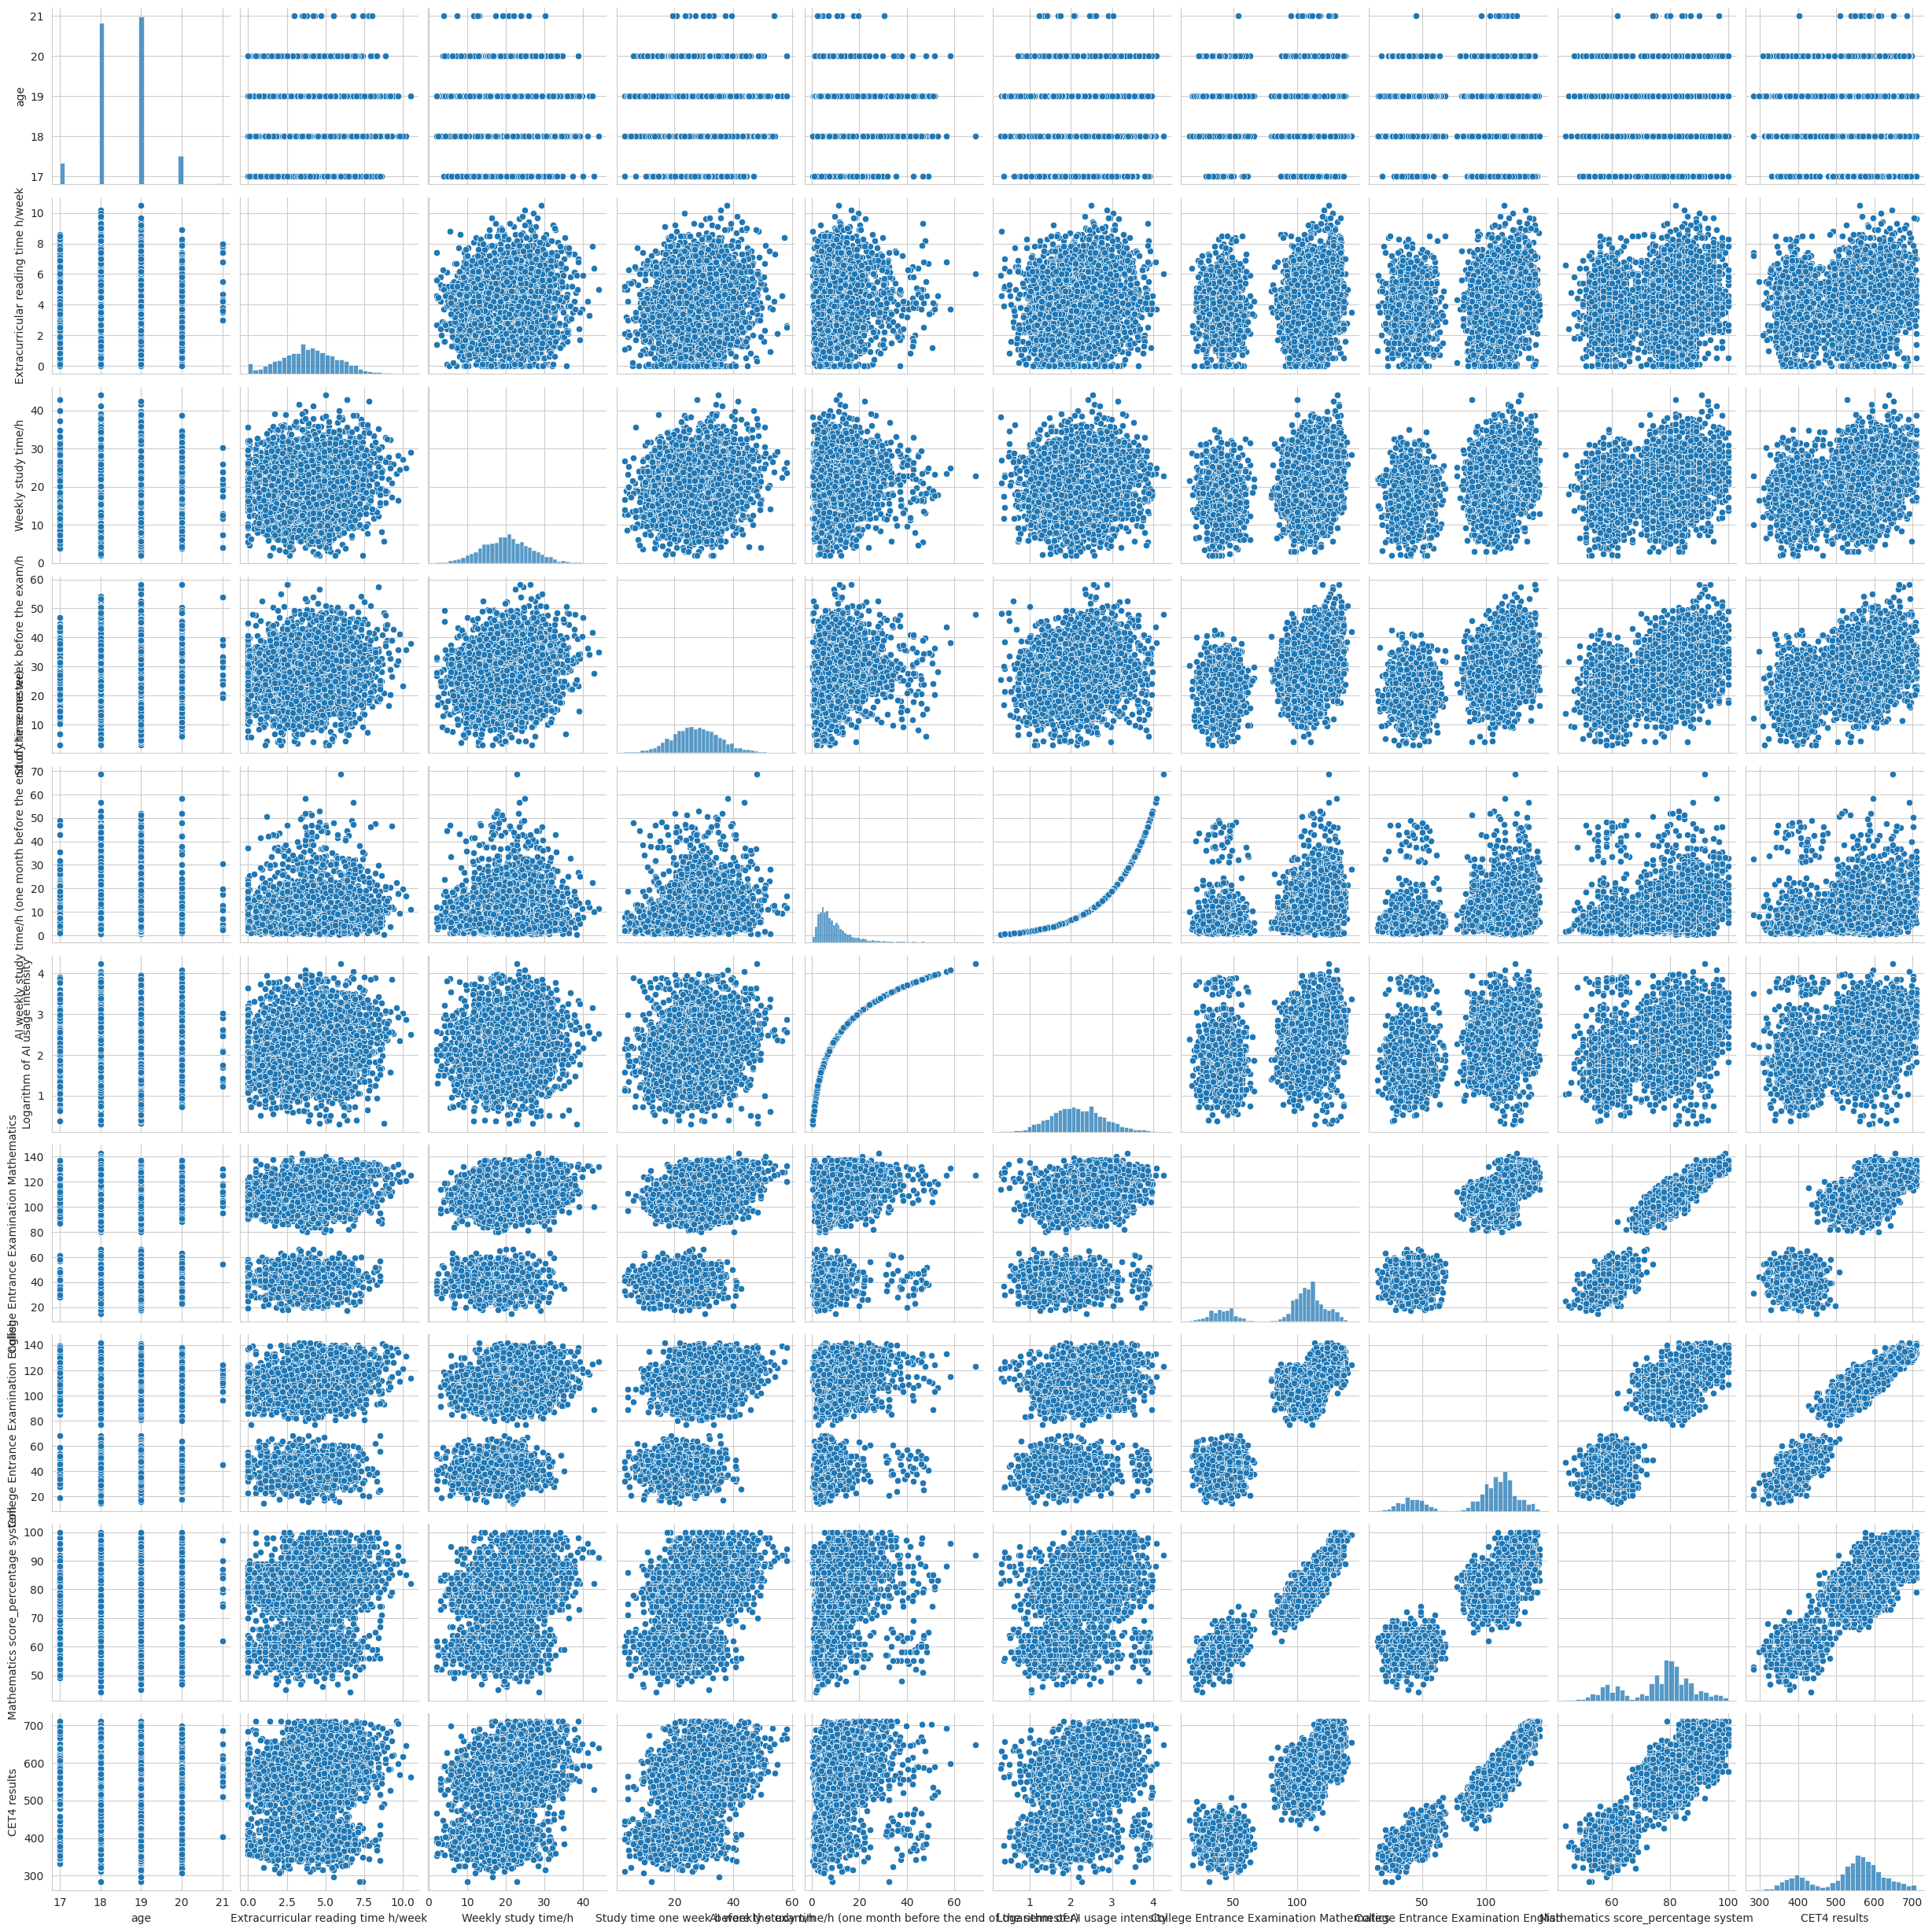

In [ ]:
sns.pairplot(df)

# Replot the data that is picked

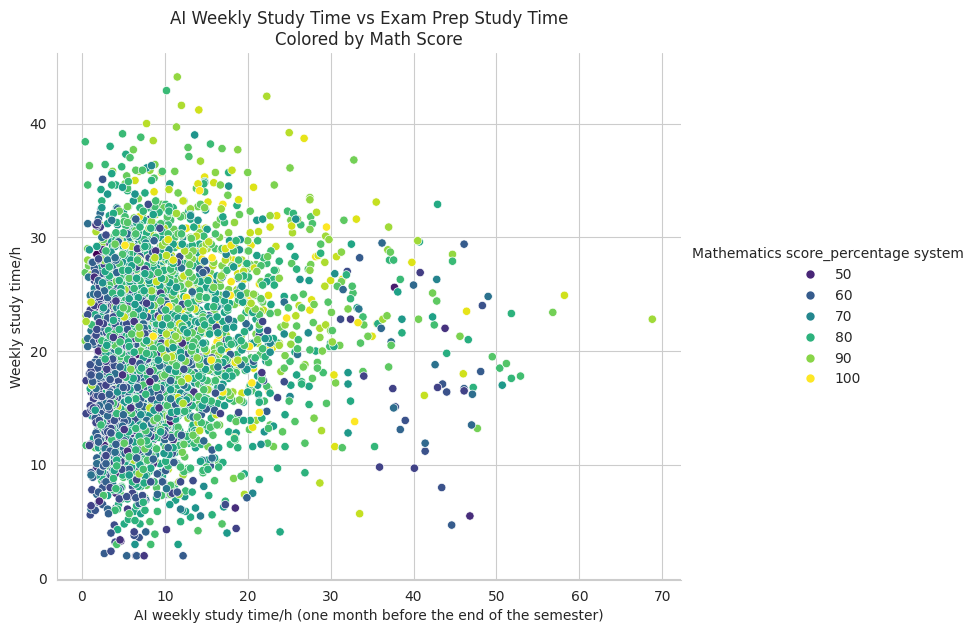

In [ ]:
sns.relplot(
    x = "AI weekly study time/h (one month before the end of the semester)",
    y = "Weekly study time/h",
    hue = "Mathematics score_percentage system",
    data = df,
    palette = "viridis",
    height = 6,
    aspect = 1.2
)

plt.title("AI Weekly Study Time vs Exam Prep Study Time\nColored by Math Score")
plt.show()

/tmp/ipython-input-3085989701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mathematics score_percentage system'])


<Axes: xlabel='Mathematics score_percentage system', ylabel='Density'>

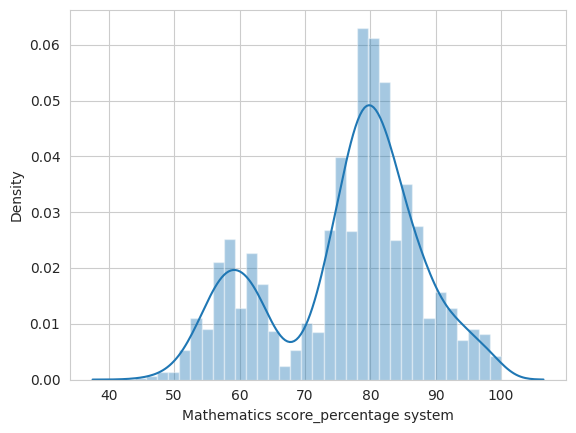

In [ ]:
sns.distplot(df['Mathematics score_percentage system'])

# Get the Dependent Variable

In [ ]:
df = df.dropna(subset=["Mathematics score_percentage system"])

y = df["Mathematics score_percentage system"]
X = df.drop(["Mathematics score_percentage system"], axis=1)

In [ ]:
X

age  Extracurricular reading time h/week  Weekly study time/h  \
0     19.0                                  3.8                 30.0   
1     19.0                                  6.3                 25.1   
2     18.0                                  8.5                 25.0   
3     18.0                                  3.6                 19.2   
4     19.0                                  5.4                 27.3   
...    ...                                  ...                  ...   
4416  18.0                                  5.3                 13.4   
4418  18.0                                  3.5                 12.6   
4419  20.0                                  5.8                 16.8   
4420  17.0                                  7.6                 18.5   
4421  19.0                                  1.6                 22.3   

      Study time one week before the exam/h  \
0                                      35.3   
1                                      33.1   
2                                      24.9   
3                                      28.9   
4                                      20.8   
...                                     ...   
4416                                   23.3   
4418                                   43.1   
4419                                   39.8   
4420                                   31.5   
4421                                   35.1   

      AI weekly study time/h (one month before the end of the semester)  \
0                                                  13.8                   
1                                                   8.6                   
2                                                  18.6                   
3                                                   9.5                   
4                                                   1.9                   
...                                                 ...                   
4416                                                7.4                   
4418                                               13.4                   
4419                                                9.0                   
4420                                                7.2                   
4421                                               14.8                   

      Logarithm of AI usage intensity  \
0                               2.691   
1                               2.260   
2                               2.977   
3                               2.349   
4                               1.072   
...                               ...   
4416                            2.131   
4418                            2.667   
4419                            2.307   
4420                            2.105   
4421                            2.763   

      College Entrance Examination Mathematics  \
0                                        127.0   
1                                        118.0   
2                                        133.0   
3                                          NaN   
4                                          NaN   
...                                        ...   
4416                                     100.0   
4418                                     121.0   
4419                                     114.0   
4420                                     112.0   
4421                                     107.0   

      College Entrance Examination English  CET4 results  
0                                      NaN         598.0  
1                                    128.0         656.0  
2                                    129.0         649.0  
3                                    115.0         575.0  
4                                     46.0         402.0  
...                                    ...           ...  
4416                                  99.0         516.0  
4418                                 121.0         666.0  
4419                                 106.0         

In [ ]:
y

0       89.0
1       83.0
2       91.0
3       78.0
4       53.0
        ... 
4416    74.0
4418    87.0
4419    82.0
4420    78.0
4421    78.0
Name: Mathematics score_percentage system, Length: 4130, dtype: float64

# Split into 80% train and 20% test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [ ]:
print("Training set", X_train.shape)
print("Testing set", X_test.shape)

Training set (3304, 9)
Testing set (826, 9)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

scaler = MinMaxScaler()


imputer = SimpleImputer(strategy="mean")
X_train[numeric_features] = imputer.fit_transform(X_train[numeric_features])
X_test[numeric_features] = imputer.transform(X_test[numeric_features])

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Start Training the Model using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Get the Intercept

In [ ]:
#get the intercept
intercept = lm.intercept_

#display the Intercept
print (f"Intercept : {intercept: .2f}")

Intercept :  46.50


Get the Coefficient

In [ ]:
coeff_df= pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

#show the coefficient
print (coeff_df)

                                                    Coefficient
age                                                    0.372774
Extracurricular reading time h/week                    1.162675
Weekly study time/h                                    0.841468
Study time one week before the exam/h                  0.953586
AI weekly study time/h (one month before the en...     3.822752
Logarithm of AI usage intensity                       -0.878372
College Entrance Examination Mathematics              37.662334
College Entrance Examination English                 -14.008238
CET4 results                                          22.975006


Start Training

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_train

array([92.09330079, 74.44374714, 56.75977241, ..., 61.48380111,
       80.89696299, 79.953001  ])

In [ ]:
y_pred_test = lm.predict(X_test)
y_pred_test

array([77.36730417, 83.61124224, 75.19232925, 63.92427731, 81.17593241,
       76.62945237, 61.57728734, 83.70371535, 82.93595469, 82.13751023,
       55.75231187, 81.60508615, 81.46179751, 64.99430557, 78.8334769 ,
       80.94178389, 80.79204773, 80.28170347, 80.81792472, 63.24687839,
       82.13509825, 79.29892629, 81.10989089, 75.87011321, 92.69390492,
       62.90075221, 81.14231915, 57.33164224, 83.95989552, 82.3452878 ,
       80.85815488, 86.93108002, 61.959981  , 80.21299705, 77.23009625,
       79.14457213, 91.2650627 , 64.6327671 , 76.07551729, 59.53747206,
       54.23424319, 79.25940593, 65.68620014, 79.69603031, 77.18608722,
       91.7026898 , 80.27825294, 63.5904817 , 61.89146696, 84.19002404,
       82.70890851, 89.0147317 , 79.87601243, 83.67964502, 86.47703036,
       58.63398494, 77.77578602, 81.80571615, 80.54398353, 58.49555805,
       75.52982616, 58.71492928, 77.1638106 , 91.22873824, 83.87110122,
       76.964625  , 81.53168999, 80.37736601, 80.061516  , 80.98

In [ ]:
print (y_pred_train[0])

92.09330079006881


In [ ]:
sample = [[18, 2, 12, 8, 3.5, 1.2, 120, 110, 500]]
print(lm.predict(sample)[0])


14551.668001526223


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_df = pd.DataFrame({
    'Actual Mathematics Percentage': y_test,
    'Predicted Mathematics Percentage': y_pred_test,
    'Difference': y_test - y_pred_test
})

y_pred_df.head(20)


Actual Mathematics Percentage  Predicted Mathematics Percentage  \
2426                           74.0                         77.367304   
808                            82.0                         83.611242   
715                            67.0                         75.192329   
1222                           59.0                         63.924277   
2682                           81.0                         81.175932   
122                            84.0                         76.629452   
781                            63.0                         61.577287   
1315                           85.0                         83.703715   
1676                           82.0                         82.935955   
3296                           82.0                         82.137510   
1679                           56.0                         55.752312   
1937                           83.0                         81.605086   
2886                           79.0                         81.461798   
648                            62.0                         64.994306   
1122                           77.0                         78.833477   
2668                           82.0                         80.941784   
2672                           78.0                         80.792048   
2249                           77.0                         80.281703   
4049                           79.0                         80.817925   
3745                           69.0                         63.246878   

      Difference  
2426   -3.367304  
808    -1.611242  
715    -8.192329  
1222   -4.924277  
2682   -0.175932  
122     7.370548  
781     1.422713  
1315    1.296285  
1676   -0.935955  
3296   -0.137510  
1679    0.247688  
1937    1.394914  
2886   -2.461798  
648    -2.994306  
1122   -1.833477  
2668    1.058216  
2672   -2.792048  
2249   -3.281703  
4049   -1.817925  
3745    5.753122

# Print the Scatterplot and Regression Line

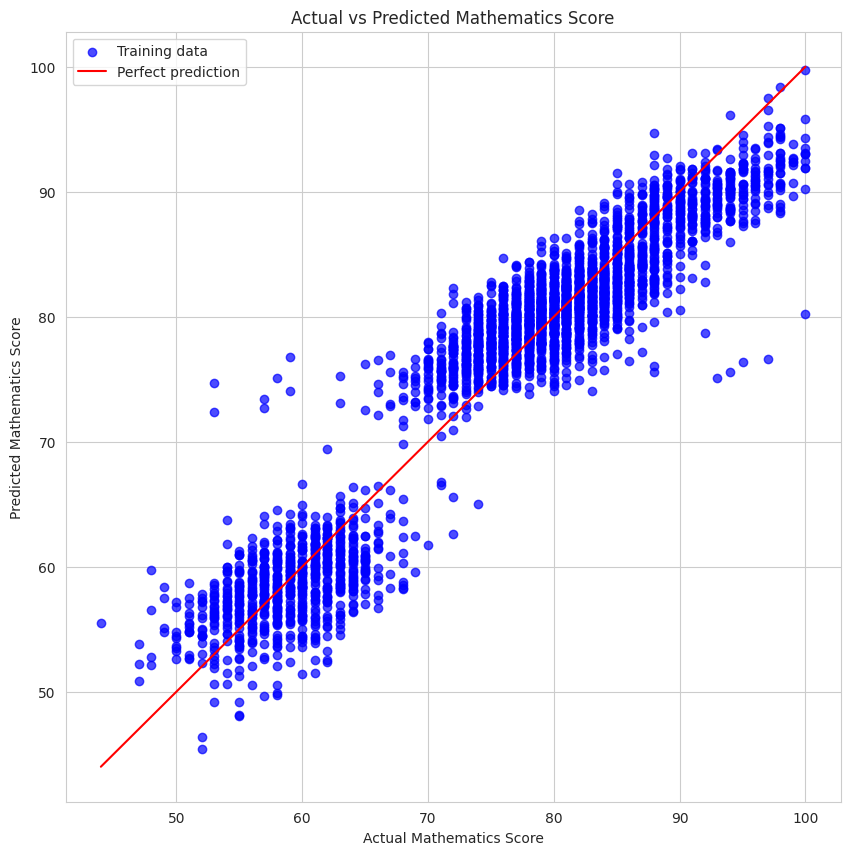

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_pred_train, label='Training data', color='b', alpha=0.7)

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r', label='Perfect prediction')

plt.legend()
plt.xlabel('Actual Mathematics Score')
plt.ylabel('Predicted Mathematics Score')
plt.title('Actual vs Predicted Mathematics Score')
plt.show()


# Get the Prediction Score

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred_train)
print (f"Score: {score*100: .2f}%")

Score:  89.97%


<Axes: xlabel='Mathematics score_percentage system'>

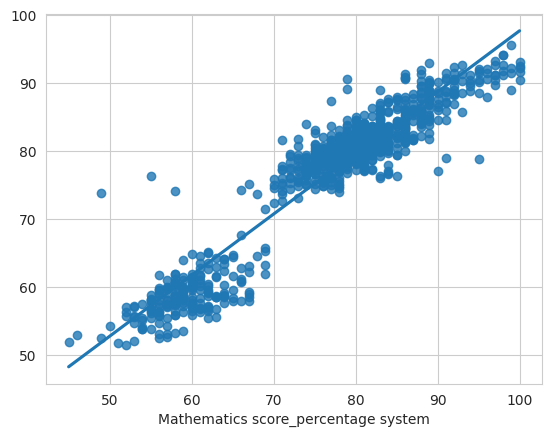

In [ ]:
import seaborn as sns
sns.regplot(x=y_test,y= y_pred_test, ci=None)

In [ ]:
import statsmodels.formula.api as smf

formula = 'Q("Mathematics score_percentage system") ~ age + Q("Extracurricular reading time h/week") + Q("Weekly study time/h") + Q("Study time one week before the exam/h") + Q("AI weekly study time/h (one month before the end of the semester)") + Q("Logarithm of AI usage intensity") + Q("College Entrance Examination Mathematics") + Q("College Entrance Examination English") + Q("CET4 results")'

model = smf.ols(formula=formula, data=df)
results = model.fit()

print(results.params)
print(results.summary())


Intercept                                                                 25.839928
age                                                                        0.016846
Q("Extracurricular reading time h/week")                                   0.110130
Q("Weekly study time/h")                                                   0.017286
Q("Study time one week before the exam/h")                                 0.013478
Q("AI weekly study time/h (one month before the end of the semester)")     0.019482
Q("Logarithm of AI usage intensity")                                       0.251050
Q("College Entrance Examination Mathematics")                              0.351468
Q("College Entrance Examination English")                                 -0.185453
Q("CET4 results")                                                          0.061707
dtype: float64
                                       OLS Regression Results                                       
Dep. Variable:     Q("Mathematics score_perc

In [ ]:
import numpy as np
import pandas as pd

x_surf, y_surf = np.meshgrid(
    np.linspace(df['AI weekly study time/h (one month before the end of the semester)'].min(), df['AI weekly study time/h (one month before the end of the semester)'].max(), 100),
    np.linspace(df['Weekly study time/h'].min(), df['Weekly study time/h'].max(), 100)
)

onlyX = pd.DataFrame({
    'age': x_surf.ravel(),
    'Weekly study time/h': y_surf.ravel(),
    'Extracurricular reading time h/week': df['Extracurricular reading time h/week'].mean(),
    'Study time one week before the exam/h': df['Study time one week before the exam/h'].mean(),
    'AI weekly study time/h (one month before the end of the semester)': df['AI weekly study time/h (one month before the end of the semester)'].mean(),
    'Logarithm of AI usage intensity': df['Logarithm of AI usage intensity'].mean(),
    'College Entrance Examination Mathematics': df['College Entrance Examination Mathematics'].mean(),
    'College Entrance Examination English': df['College Entrance Examination English'].mean(),
    'CET4 results': df['CET4 results'].mean()
})

fittedY = results.predict(exog=onlyX)
fittedY = np.array(fittedY).reshape(x_surf.shape)


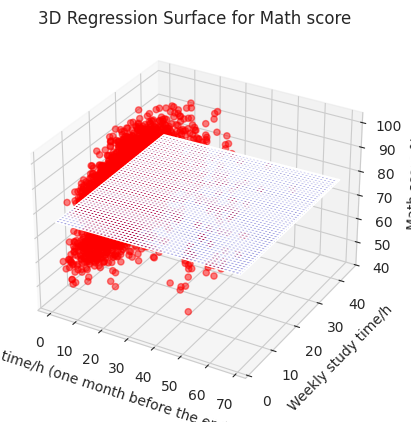

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['AI weekly study time/h (one month before the end of the semester)'],
    df['Weekly study time/h'],
    df['Mathematics score_percentage system'],
    c='red',
    marker='o',
    alpha=0.5,
    label='Actual data'
)

ax.plot_surface(
    x_surf,
    y_surf,
    fittedY,
    color='blue',
    alpha=0.3
)

ax.set_xlabel('AI weekly study time/h (one month before the end of the semester)')
ax.set_ylabel('Weekly study time/h')
ax.set_zlabel('Math score %')
ax.set_title('3D Regression Surface for Math score')

plt.show()
